We now evaluate the models. We start by comparing the counts of false positives to false negatives for each model, but now they are evaluated on the same continuous day sample of daily living.

In [1]:
import sys
import os
import torch

sys.path.append(os.path.abspath('..')) #so we can import for the dir above

from RegNet import RegNet
from eval_in_time_domain import eval_in_time_domain

In [2]:
RECODING_TO_EVAL_ON = '/home/kuba/Documents/data/raw/kuba_watch_data/2024-07-10_06_42_46'
PATH_TO_BOUT_DIR = '/home/kuba/Documents/data/raw/listerine/3_final'


WINDOW_SIZE = 400
STRIDE = 50
CONFIDANCE_THRESHOLD = 0.95
OVERLAP_THRESHOLD = 0.85
MIN_BOUT_LEN = 400
NUM_BOUT_TO_SAMP = 45
DEVICE = 'cuda:0'

WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 416, Gyro: 416
Bout shape - Acc: 450, Gyro: 450
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 460, Gyro: 460
Bout shape - Acc: 438, Gyro: 438
Bout shape - Acc: 400, Gyro: 400
Bout shape - Acc: 600, Gyro: 600
Bout shape - Acc: 569, Gyro: 569
Bout shape - Acc: 521, Gyro: 521
Bout shape - Acc: 424, Gyro: 424
Bout shape - Acc: 419, Gyro: 419
Bout shape - Acc: 418, Gyro: 418
Bout shape - Acc: 743, Gyro: 743
Bout shape - Acc: 415, Gyro: 415
Bout shape - Acc: 678, Gyro: 678
Bout shape - Acc: 628, Gyro: 628
Bout shape - Acc: 600, Gyro: 600
Bout shape - Acc: 802, Gyro: 802
Bout shape - Acc: 428, Gyro: 428
Bout shape - Acc: 418, Gyro: 418
Bout shape - Acc: 504, Gyro: 504
Bout shape - Acc: 495, Gyro: 495
Bout shape - Acc: 400, Gyro: 400
Bout shape - Acc: 417, Gyro: 417
Bout shape - Acc: 535, Gyro: 535
Bout shape - Acc: 837, Gyro: 837
Bout shape - Acc: 628

/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


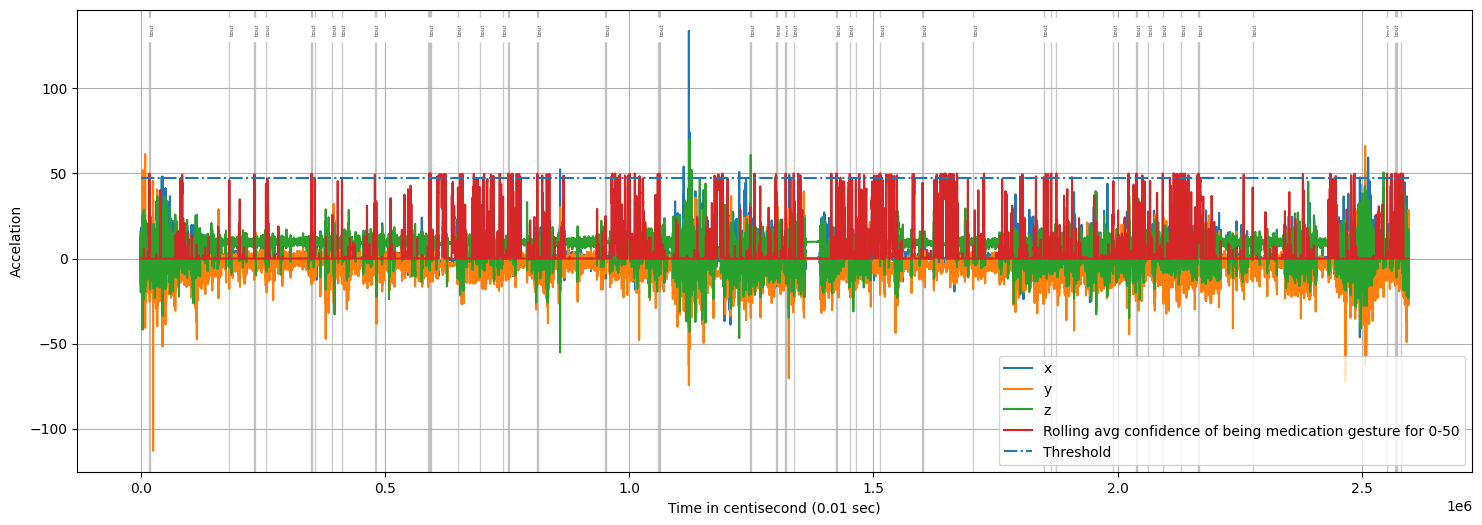

There are 119 FP's of 142 total peaks (confidance over: 0.95 and does not overlap with bout threshold:0.85)
FP's are at rate of 83.80%
TP's are at rate of 16.1972%
Out of 45 model found 23 (51.11)
Normalized on True


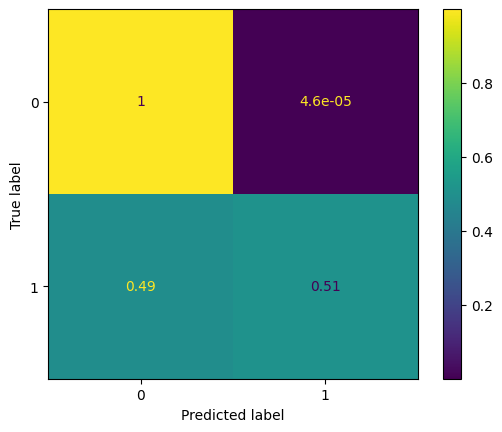

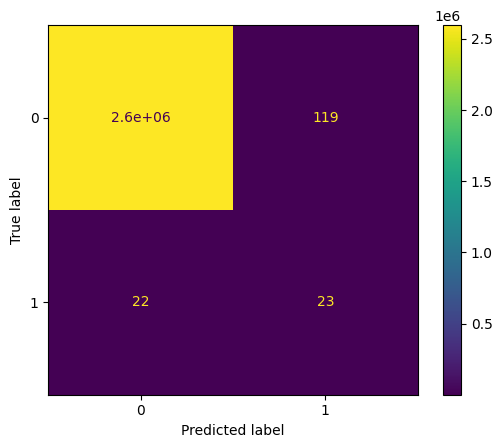

In [3]:
#load model00
model00_path = '/home/kuba/projects/medication-taking-data/new_start/week02/00_no_movment/94f1_with_filter_noMovmets.pth'
model = RegNet()
model.load_state_dict(torch.load(model00_path))

#get false postive count

TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                            confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                            num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)


WARNING we will sample bouts from all participants there will be data leakage, unless you specify who not to sample from
Bout shape - Acc: 521, Gyro: 521
Bout shape - Acc: 1029, Gyro: 1029
Bout shape - Acc: 446, Gyro: 446
Bout shape - Acc: 400, Gyro: 400
Bout shape - Acc: 594, Gyro: 594
Bout shape - Acc: 501, Gyro: 501
Bout shape - Acc: 510, Gyro: 510
Bout shape - Acc: 418, Gyro: 418
Bout shape - Acc: 419, Gyro: 419
Bout shape - Acc: 575, Gyro: 575
Bout shape - Acc: 693, Gyro: 693
Bout shape - Acc: 440, Gyro: 440
Bout shape - Acc: 535, Gyro: 535
Bout shape - Acc: 416, Gyro: 416
Bout shape - Acc: 584, Gyro: 584
Bout shape - Acc: 469, Gyro: 469
Bout shape - Acc: 400, Gyro: 400
Bout shape - Acc: 522, Gyro: 522
Bout shape - Acc: 697, Gyro: 697
Bout shape - Acc: 693, Gyro: 693
Bout shape - Acc: 901, Gyro: 901
Bout shape - Acc: 416, Gyro: 416
Bout shape - Acc: 522, Gyro: 522
Bout shape - Acc: 740, Gyro: 740
Bout shape - Acc: 524, Gyro: 524
Bout shape - Acc: 619, Gyro: 619
Bout shape - Acc: 4

/home/kuba/.virenv/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


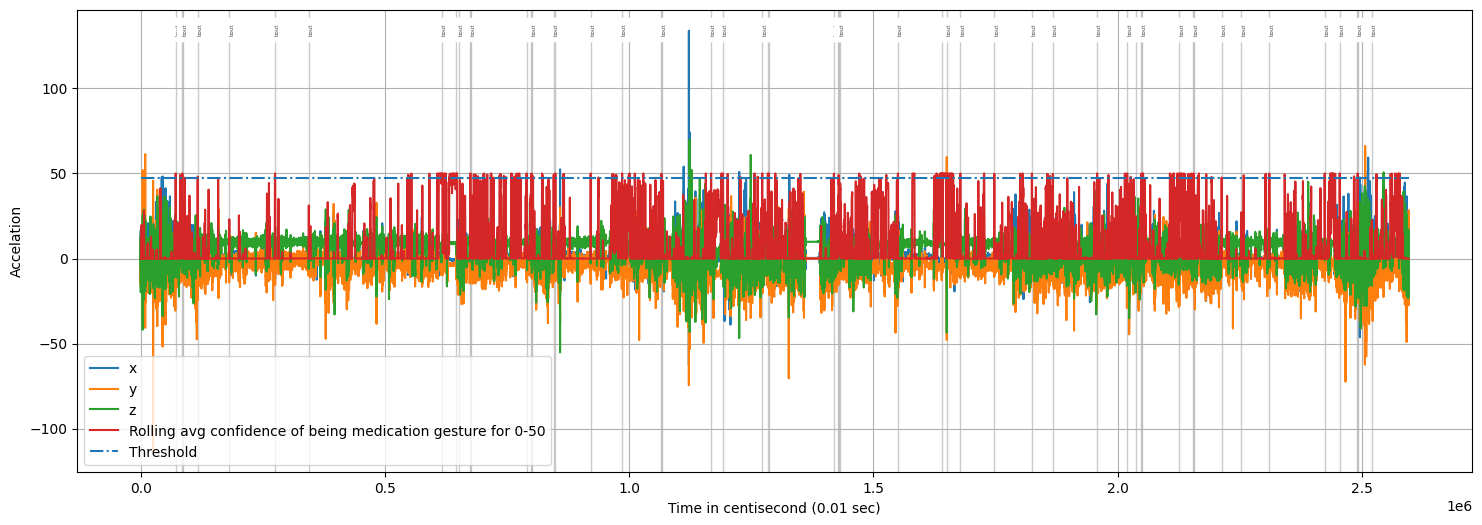

There are 140 FP's of 171 total peaks (confidance over: 0.95 and does not overlap with bout threshold:0.85)
FP's are at rate of 81.87%
TP's are at rate of 18.1287%
Out of 45 model found 31 (68.89)
Normalized on True


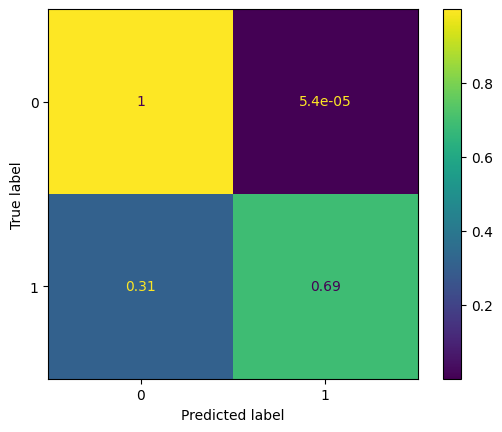

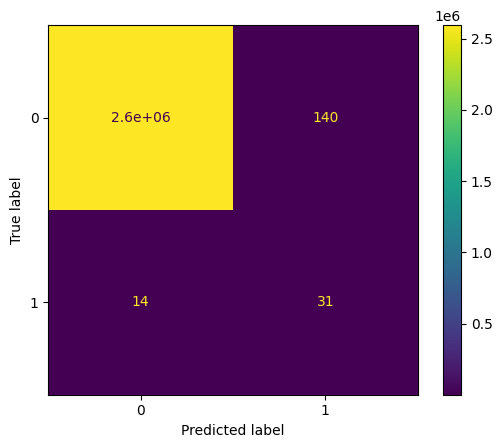

In [4]:
#load model01
model01_path = '/home/kuba/projects/medication-taking-data/new_start/week02/00_no_movment/94f1_without_filter_noMovments.pth'
model = RegNet()
model.load_state_dict(torch.load(model01_path))
#get false postive count
TP, TN, FP, FN, total = eval_in_time_domain(model, path_to_daily_dir=RECODING_TO_EVAL_ON, path_to_bout_dir=PATH_TO_BOUT_DIR, window_size=WINDOW_SIZE, stride=STRIDE, 
                                            confidance_threshold_for_mean=CONFIDANCE_THRESHOLD, overlap_threshold=OVERLAP_THRESHOLD, min_bout_len=MIN_BOUT_LEN, 
                                            num_bouts_to_samp=NUM_BOUT_TO_SAMP, device=DEVICE)

so we definitely dont want o filet out the the no movments